<h1>How to perform Exploratory Data Analysis on a New Dataset</h1>
<p>This python notebook contains code for the exploratory data analysis of a publicily available dataset of road accidents in the UK in 2017 <a href=http://data.dft.gov.uk.s3.amazonaws.com/road-accidents-safety-data/dftRoadSafetyData_Accidents_2017.zip>RoadSafetyData_Accidents_2017</a>. It also provides a baseline classification model that forecasts the probability of a police officer to attend an accident.</p>

<h2>Exploratory Data Analysis</h2>

<p>As the first step of our analysis let's load the accident dataset and get an impression of the variables inside.</p>

In [1]:
import pandas as pd
import numpy as np

import missingno as msno

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
ACCEDENTS_PATH = "data/Acc.csv"
acc_df = pd.read_csv(ACCEDENTS_PATH, parse_dates=["Date"], dtype={"Accident_Index": object})

<p>We will copy the dataframe in a separate variable, so the original data stays intact during the analysis.</p>

In [3]:
data = acc_df.copy()

In [4]:
data.head()

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,2017010001708,532920.0,196330.0,-0.080107,51.650061,1,1,2,3,2017-05-08,...,0,0,4,1,1,0,0,1,1,E01001450
1,2017010009342,526790.0,181970.0,-0.173845,51.522425,1,3,2,1,2017-01-01,...,0,0,4,1,2,0,0,1,1,E01004702
2,2017010009344,535200.0,181260.0,-0.052969,51.514096,1,3,3,1,2017-01-01,...,0,0,4,1,1,0,0,1,1,E01004298
3,2017010009348,534340.0,193560.0,-0.060658,51.624832,1,3,2,1,2017-01-01,...,0,4,4,2,2,0,0,1,1,E01001429
4,2017010009350,533680.0,187820.0,-0.072372,51.573408,1,2,1,1,2017-01-01,...,0,5,4,1,2,0,0,1,1,E01001808


<p>The dataset contains 32 variables most of which are categorical. We can check the meaning of each variable and its values in the <a href=http://data.dft.gov.uk/road-accidents-safety-data/variable%20lookup.xls> Variable Lookup</a>.</p>

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129982 entries, 0 to 129981
Data columns (total 32 columns):
Accident_Index                                 129982 non-null object
Location_Easting_OSGR                          129963 non-null float64
Location_Northing_OSGR                         129963 non-null float64
Longitude                                      129953 non-null float64
Latitude                                       129953 non-null float64
Police_Force                                   129982 non-null int64
Accident_Severity                              129982 non-null int64
Number_of_Vehicles                             129982 non-null int64
Number_of_Casualties                           129982 non-null int64
Date                                           129982 non-null datetime64[ns]
Day_of_Week                                    129982 non-null int64
Time                                           129979 non-null object
Local_Authority_(District)                

<p>Most of the variables in the accident dataset are numerical. We also have one variable that we explicitly set up as a datatime object while reading and four object variables:</p>
<ul>
    <li>Accident_Index - index of the accident</li>
    <li>Time - time in a format HH:mm</li>
    <li>Local_Authority_(Highway), LSOA_of_Accident_Location  - categorical variables that contain information about location of the accident.</li>
</ul>
<p>Information about the variables and meaning of the categories could be found in <a href=http://data.dft.gov.uk/road-accidents-safety-data/variable%20lookup.xls> Variable Lookup</a>.</p>

<h3>Missing Values Analysis</h3>
<p>The first thing we need to do when we get a new dataset is to evaluate the data quality. Let's get an overview of the missing values.</p>
<p>In the accident dataset the missing values are indicated with a value of "-1". First of all we need to replace it with a NaN value, so we can get an overview of a pattern of missing values.</p>

In [6]:
data.replace(-1, np.nan, inplace=True)

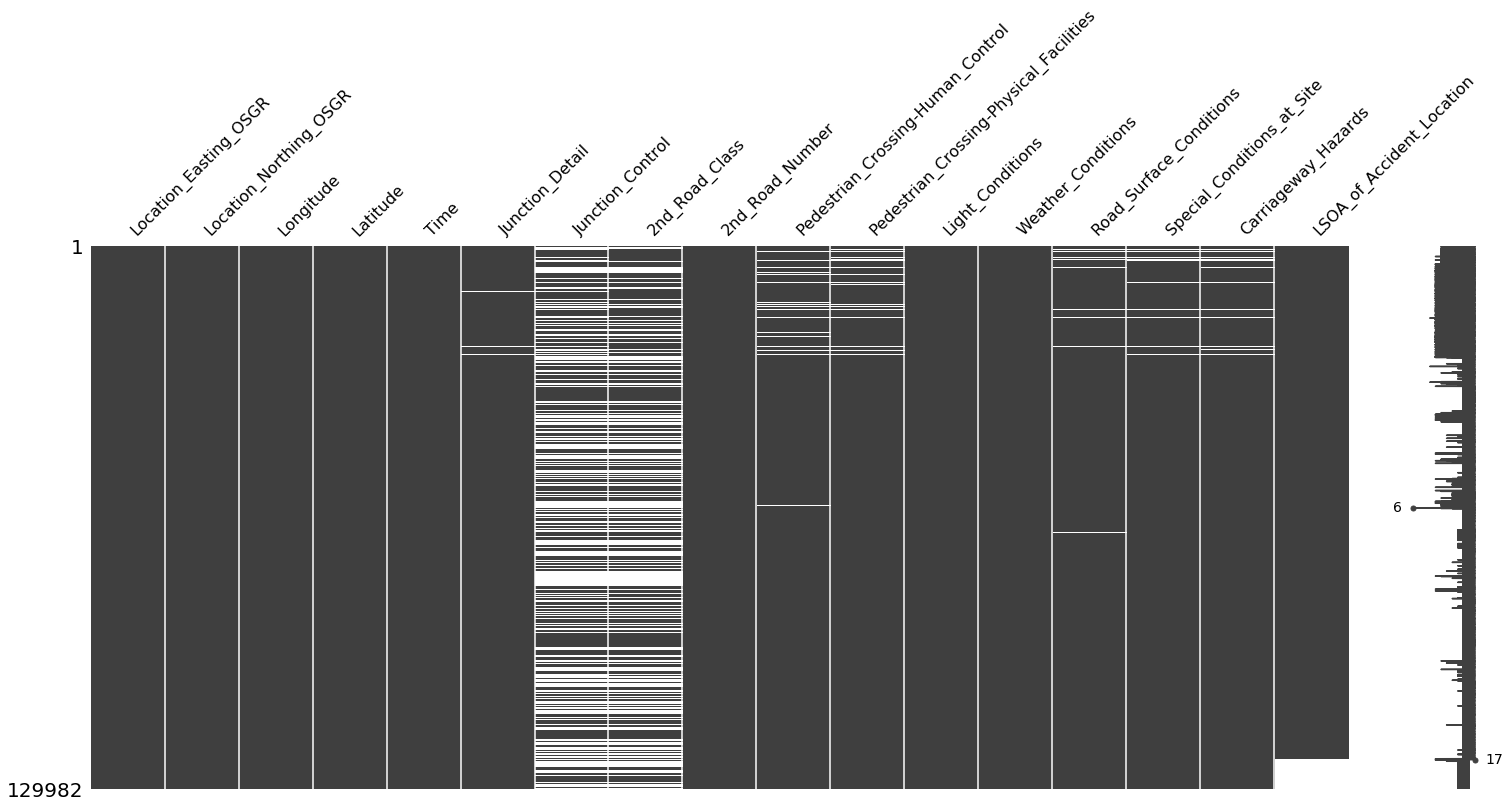

In [7]:
missingdata_df = data.columns[data.isnull().any()].tolist()
msno.matrix(data[missingdata_df])

<p>There are a few columns where missing values seem to be associated:</p>
<ul>   
    <li>Junction_Control with 2nd_Road_Class</li>
    <li>Pedestrian_Crossing-Human_Control with Pedestrian_Crossing-Physical_Facilities</li>
    <li>Road_Surface_Conditions with Special_Conditions_at_Site and Carriageway_Hazards</li>
</ul>
<p>That means that the values are not missing at random which we need to keep in mind while working on a strategy for handling missing values.</p>
<p>Also some variables like Junction_Control will be shown to have a significant impact on the response variable. Therefore in future the missing values should be completed, e.g. by vehicle sensor data.</p>

<h3>Overview of the Distributions</h3>

<p>As we see the dataset contains different types of data: Geografical, Categorical, Time Series. All types of data should be adressed and analysed individually.</p>
<p>Let's take a first glimps on how the data look like by plotting its distribution.</p>

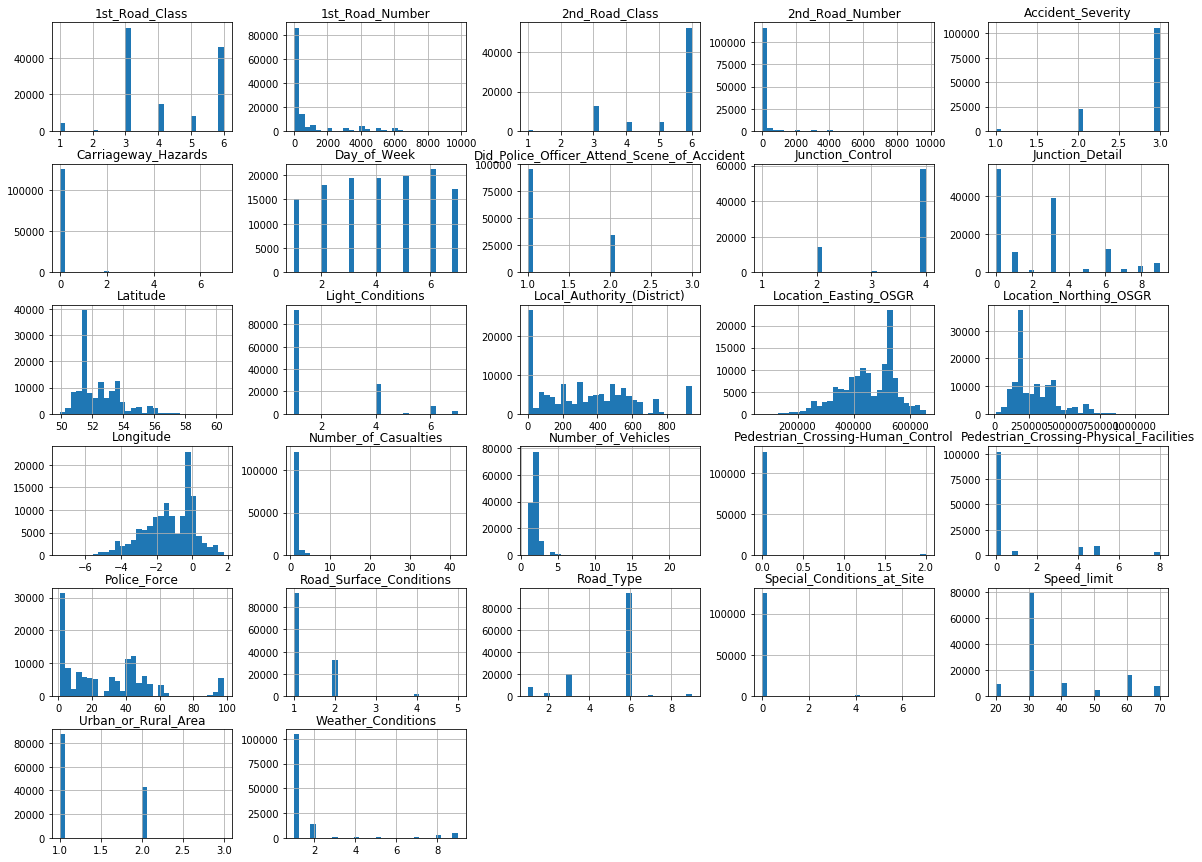

In [8]:
data.hist(bins=30, figsize=(20,15))
plt.show()

<p>Most of the variables are categorical with a low cardinality. We also see the some pairs of features like</p> 
    <ul>
    <li>Longitude and Location_Easting_OSGR</li> 
    <li>Lattitude and Location_Northing_OSGR</li> 
    </ul>
<p>have very similar distributions. They likely duplicate the information. Therefore we can concentrate on analysing only Lattitude as well as Longitude and omit Location_Easting_OSGR as well as Location_Northing_OSGR for now.</p>
<p>Let's take a brief look at the variable that we want to forcast, as the further analysis will be performed in its context.</p>

In [9]:
data["Did_Police_Officer_Attend_Scene_of_Accident"].value_counts()/data.shape[0]

1    0.735325
2    0.264606
3    0.000069
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: float64

<p>The response variable contains three classes. We are only interested in the probability of a police officer attending an accident, therefore we will merge class 2 and 3 to a negative class.</p>

In [10]:
data.loc[data["Did_Police_Officer_Attend_Scene_of_Accident"] > 1, 
            "Did_Police_Officer_Attend_Scene_of_Accident"] = 0

In [11]:
data["Did_Police_Officer_Attend_Scene_of_Accident"].value_counts()/data.shape[0]

1    0.735325
0    0.264675
Name: Did_Police_Officer_Attend_Scene_of_Accident, dtype: float64

<p>The classes are imbalanced which is something to keep in mind while training the model.</p>

<h3>Geographical data</h3>

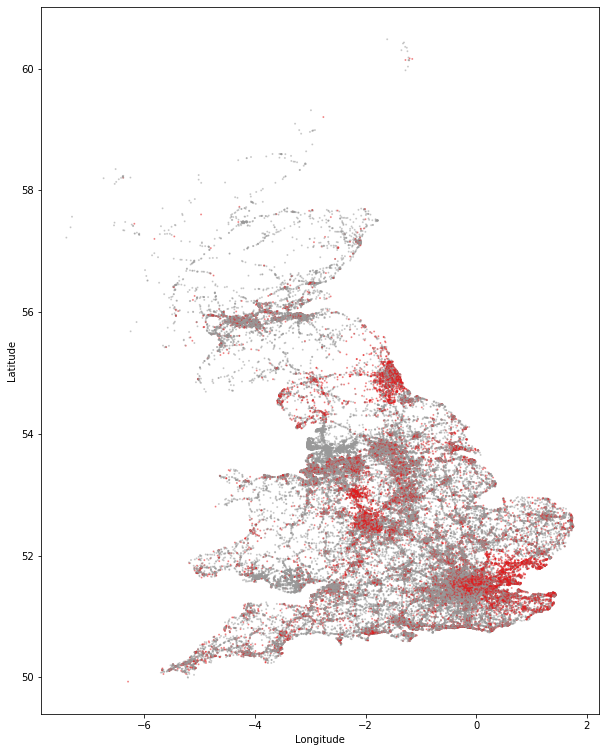

In [12]:
data.plot(kind="scatter", x="Longitude", y="Latitude", figsize = (10,13), alpha=0.4,s=1,
            c=data["Did_Police_Officer_Attend_Scene_of_Accident"], cmap=plt.get_cmap("Set1"), colorbar=False,
            sharex=False)

<p>red  - Not Attended</p>
<p>gray - Attended</p>
<p>The plot shows that there are areas where police officer are less likely to attend an accident. When we train a model, Longitude and Latitude might be variables with a high discriminative power.</p>

<h3>Let's now check a few hypothesis about retations between variables in the dataset.</h3>
<h4>The first hyphothesis to test would be whether or not the probability of an officer to attend an accident depends on a severity of the accident</h4>

In [13]:
data["Did_Police_Officer_Attend_Scene_of_Accident"] = data["Did_Police_Officer_Attend_Scene_of_Accident"].replace({0: 'No', 1: 'Yes'})
data["Accident_Severity"] = data["Accident_Severity"].replace({1: 'Fatal', 2: 'Serious', 3:'Slight'})

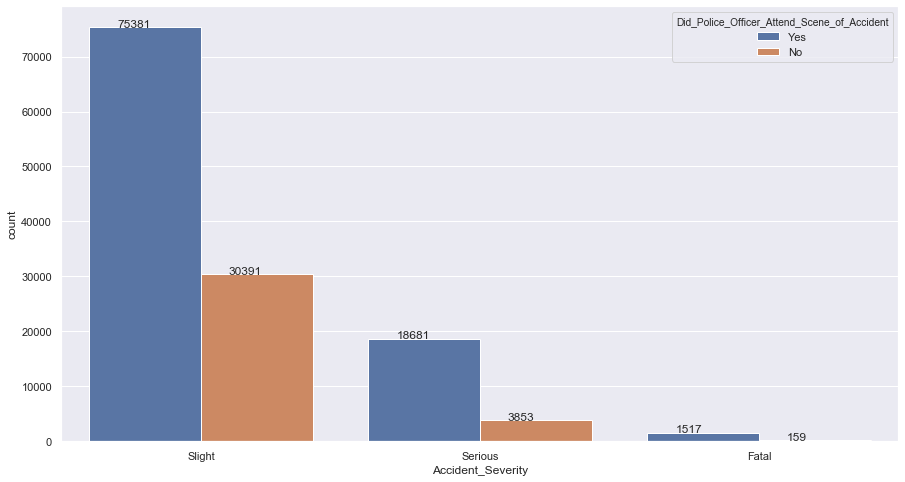

In [14]:
order = ['Slight', 'Serious', 'Fatal']
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='Accident_Severity', hue='Did_Police_Officer_Attend_Scene_of_Accident', data=data, order=order)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.1, patch_height+50))
plt.show()

<p>We can observe a difference between the groups, but we need to quantify these relationships. For that we will perfom a chi-squared test.<p>
<p>To perform a chi-squared test I use the researchpy package. Researchpy produces Pandas DataFrames that contain relevant statistical testing information that is commonly required for academic research.</p>

In [15]:
import researchpy as rp
table, results = rp.crosstab(data['Accident_Severity'], 
                             data["Did_Police_Officer_Attend_Scene_of_Accident"], 
                             prop= 'col', test= 'chi-square')
    
table

Did_Police_Officer_Attend_Scene_of_Accident                
                                                           No     Yes     All
Accident_Severity                                                            
Fatal                                                    0.46    1.59    1.29
Serious                                                 11.20   19.55   17.34
Slight                                                  88.34   78.87   81.37
All                                                    100.00  100.00  100.00

In [16]:
results

,Chi-square test,results
0,Pearson Chi-square ( 2.0) =,1543.4366
1,p-value =,0.0000
2,Cramer's V =,0.1090


<p>The result of the test suggests that there is an association between the variables Accident_Severity and Did_Police_Officer_Attend_Scene_of_Accident with a p-value less than 0.05 and effect size 0.1.</p>
<p>Now that we know that the association is significant, we want to test where the relationship is between the levels of the variables. In order to do this, we need to conduct multiple 2×2 chi-squared tests using the Bonferroni-adjusted p-value. We will use the stats package from scipy for that, as we do not need to store our results in a Pandas DataFrame.</p>

In [17]:
from scipy import stats

dummies = pd.get_dummies(data['Accident_Severity'])
dummies.head()

,Fatal,Serious,Slight
0,1,0,0
1,0,0,1
2,0,0,1
3,0,0,1
4,0,1,0


In [18]:
p_value = 0.05
bf_p_value = p_value/dummies.shape[1]
print("Bonferroni-adjusted p-value is %.3f" % bf_p_value)

Bonferroni-adjusted p-value is 0.017


In [19]:
for series in dummies:
    nl = "\n"
    crosstab = pd.crosstab(dummies[series], data["Did_Police_Officer_Attend_Scene_of_Accident"])
    print(crosstab, nl)
    chi2, p, dof, expected = stats.chi2_contingency(crosstab)
    print(f"Chi2 value= {chi2}{nl}p-value= {p}{nl}Degrees of freedom= {dof}{nl}")

Did_Police_Officer_Attend_Scene_of_Accident     No    Yes
Fatal                                                    
0                                            34244  94062
1                                              159   1517 

Chi2 value= 250.6677846811702
p-value= 1.8571943751610808e-56
Degrees of freedom= 1

Did_Police_Officer_Attend_Scene_of_Accident     No    Yes
Serious                                                  
0                                            30550  76898
1                                             3853  18681 

Chi2 value= 1228.8607555828592
p-value= 3.2592182183357176e-269
Degrees of freedom= 1

Did_Police_Officer_Attend_Scene_of_Accident     No    Yes
Slight                                                   
0                                             4012  20198
1                                            30391  75381 

Chi2 value= 1496.3717770027574
p-value= 0.0
Degrees of freedom= 1



<p>The chi-squared test using the Bonferroni-adjusted p-value of 0.017 showes that all pairwise comparisons are significant.</p>
<p>Hovever it is quite time consuming to run chi-squared tests for each pair of variables in our dataset. Therefore we will want to run a similar analysis to build an association matrix as the last step of our data exploration.</p>

<h3>Date and Time</h3>

In [20]:
data["Time"] = data["Time"].str.split(':').str[0]

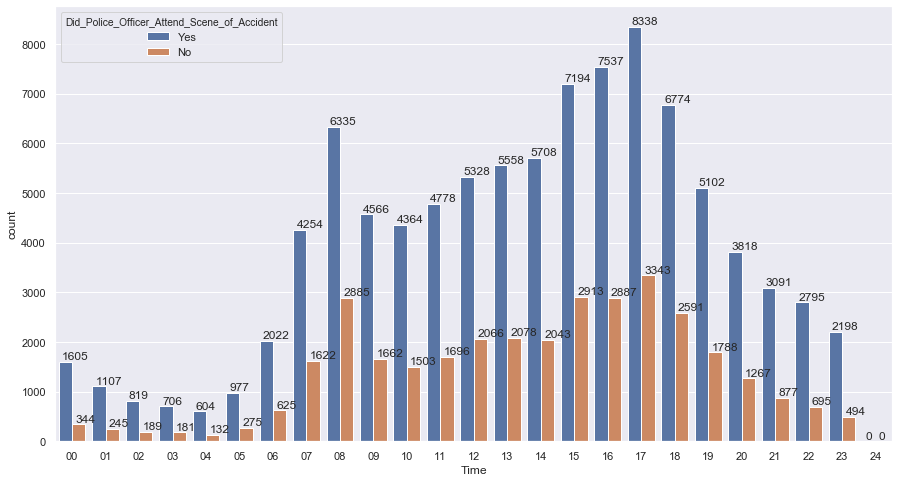

In [21]:
order = ['00','01','02','03','04','05','06','07','08','09','10','11','12','13','14','15','16','17','18','19','20','21','22','23','24']
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='Time', 
                 hue='Did_Police_Officer_Attend_Scene_of_Accident', 
                 data=data,
                 order=order)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.1, patch_height+50))
plt.show()

<p>We can observe two rush periods where accidents are more likely to happen: between 7-9 AM and 15-18 PM. Let's create a binary variable indicating a rush hour and check the hypothesis if during rush hours the overall probability of a police officer to attend an accident is different from non-rush hours.</p>

In [22]:
data["Rush_Hour"] = data["Time"].isin(['07','08','09','15','16','17','18']).astype(int)

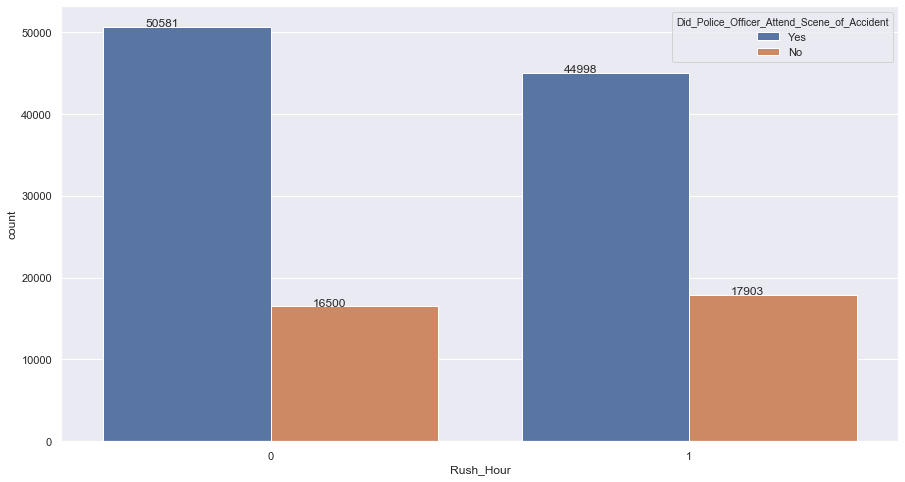

In [23]:
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='Rush_Hour', 
                 hue='Did_Police_Officer_Attend_Scene_of_Accident', 
                 data=data)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.1, patch_height+50))
plt.show()

<p>There is a slight difference between the groups. Let's quantify it.<p>

In [24]:
table, results = rp.crosstab(data['Rush_Hour'], 
                             data["Did_Police_Officer_Attend_Scene_of_Accident"], 
                             prop= 'col', test= 'chi-square')
    
results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,249.1687
1,p-value =,0.0000
2,Cramer's phi =,0.0438


<p>The chi-squared test found a significant association between the groups with a p-value less than 0.05.<p>
<p>Now let's take a look at the time series of accidents.</p>

In [25]:
ts_df = pd.DataFrame()
ts_df["Accedents"]=data.groupby("Date")['Did_Police_Officer_Attend_Scene_of_Accident'].count()

data['Attent_or_Not'] = data['Did_Police_Officer_Attend_Scene_of_Accident'].mask(
    data['Did_Police_Officer_Attend_Scene_of_Accident'].ne('No'))
ts_df["Attended"]=data.groupby(['Date'])['Attent_or_Not'].count()

rolling_att = ts_df["Attended"].rolling(window=14).mean()
rolling_acc= ts_df["Accedents"].rolling(window=14).mean()

Text(0.5, 1.0, 'Number of accidents per day')

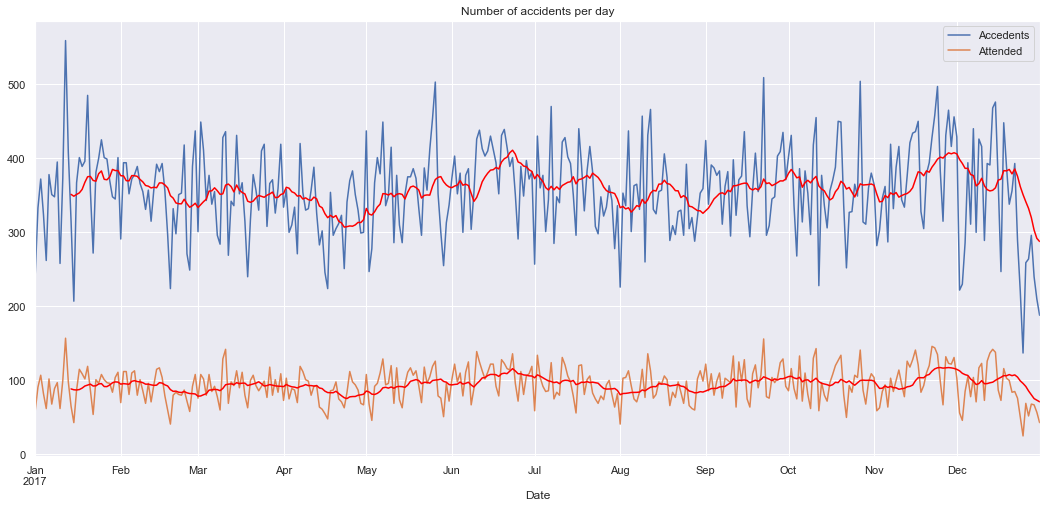

In [26]:
ts_df['Accedents'].plot(figsize=(18,8), legend=True)
rolling_acc.plot(color='red')

ts_df['Attended'].plot(figsize=(18,8), legend=True)
rolling_att.plot(color='red')
plt.title("Number of accidents per day")

<p>The plot shows a repeating pattern, which might suggest that there is a cyclical pattern. Let's invistigate it further.</p>

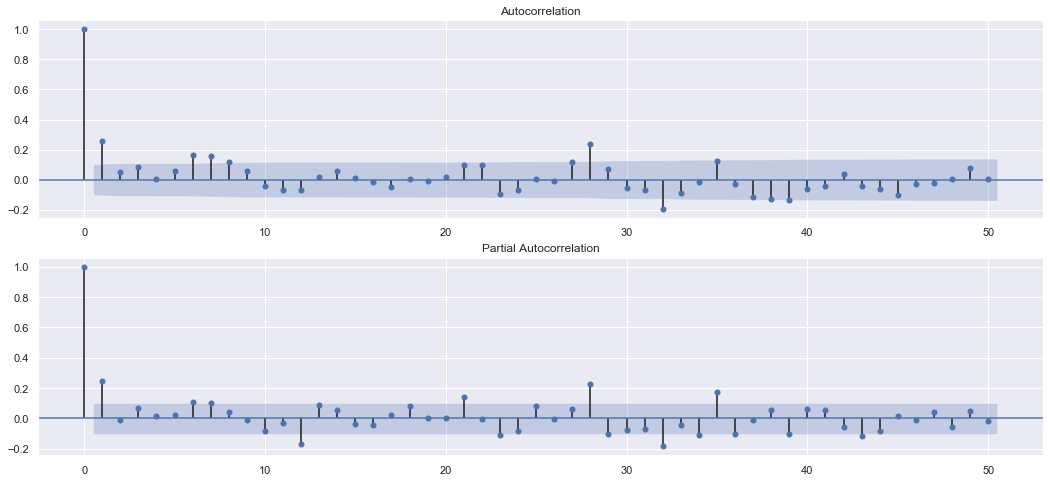

In [27]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

plt.figure(figsize=(18,8))
plt.subplot(211)
plot_acf(ts_df["Attended"], lags=50, ax=plt.gca());
plt.subplot(212)
plot_pacf(ts_df["Accedents"], lags=50, ax=plt.gca());

<p>The ACF plot shows a significant seasonal component at lags 6 and 7, which might indicate a weekend. Let's check it.</p>

In [28]:
data["Day_of_Week"] = data["Day_of_Week"].replace({1: 'Sunday', 
                                                   2: 'Monday', 
                                                   3: 'Tuesday',
                                                   4: 'Wednesday',
                                                   5: 'Thurstday',
                                                   6: 'Friday',
                                                   7: 'Saturday'})

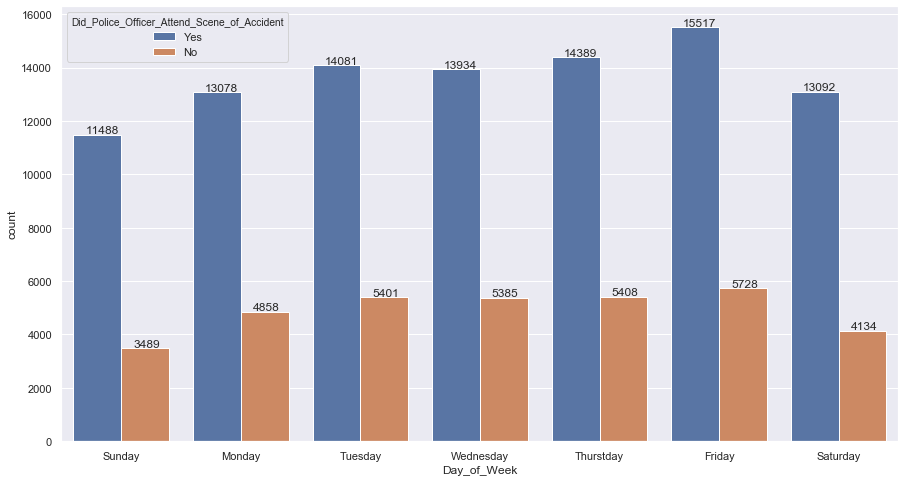

In [29]:
order = ['Sunday', 'Monday', 'Tuesday','Wednesday', 'Thurstday','Friday', 'Saturday']
sns.set(rc={'figure.figsize':(15,8)})
ax=sns.countplot(x='Day_of_Week', 
                 hue='Did_Police_Officer_Attend_Scene_of_Accident', 
                 data=data, order=order)
for p in ax.patches:
    patch_height = p.get_height()
    if np.isnan(patch_height):
        patch_height = 0
    ax.annotate('{}'.format(int(patch_height)), (p.get_x()+0.1, patch_height+50))
plt.show()

<p>We can observe a slight drop in overall accidents and those that were attended during weekends. Let's model weekends explicitly and check the hypothesis whether the probability of a police officer to attend an accident on the weekends differs from the week days.</p>

In [30]:
data["Weekend"] = data["Day_of_Week"].isin(["Sunday","Saturday"]).astype(int)
table, results = rp.crosstab(data['Weekend'], 
                             data["Did_Police_Officer_Attend_Scene_of_Accident"], 
                             prop= 'col', test= 'chi-square')
results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,171.9312
1,p-value =,0.0000
2,Cramer's phi =,0.0364


<p>The association is significant with a relatively small effect size.</p>

<h2>Feature Engineering</h2>
<h3>Joining Additional Data</h3>
<p>We have already tested a few hypotheses and engineered a few features such as Rush_Hour and Weekend. Now let's join other data that are available.</p>
<h4>Join the data about casualities</h4>

In [31]:
CASUALTIES_PATH = "data/Cas.csv"
cas_df = pd.read_csv(CASUALTIES_PATH, dtype={"Accident_Index": object})
cas_df.head()

,Accident_Index,Vehicle_Reference,Casualty_Reference,Casualty_Class,Sex_of_Casualty,Age_of_Casualty,Age_Band_of_Casualty,Casualty_Severity,Pedestrian_Location,Pedestrian_Movement,Car_Passenger,Bus_or_Coach_Passenger,Pedestrian_Road_Maintenance_Worker,Casualty_Type,Casualty_Home_Area_Type,Casualty_IMD_Decile
0,2017010001708,1,1,2,2,18,4,3,0,0,1,0,0,9,1,2
1,2017010001708,2,2,1,1,19,4,2,0,0,0,0,0,2,-1,-1
2,2017010001708,2,3,2,1,18,4,1,0,0,0,0,0,2,-1,-1
3,2017010009342,1,1,2,2,33,6,3,0,0,1,0,0,9,1,5
4,2017010009344,3,1,1,2,31,6,3,0,0,0,0,0,9,1,5


<p>The same as with the Accident dataset, the Casulties dataset contains categorical variables. From the first three rows we can see that the Accident_Index is not unique for each row, as one accident may lead to multiple casulties. For us that means that we can not join these two tables directly but rather need to do a feature engineering. For the first evaluation let's join just a few variables from the Casulties dataset.</p>
<p>Let's shape an assumption that the police is more likely to attend accidents where casualties are pedastrians, people under 18, or people above 65 years old.</p>

In [32]:
# according to the lookup table pedastrians belong to the category 3
cas_df["Pedastrian"] = (cas_df["Casualty_Class"] == 3).astype(int) 
cas_df["Under_18"] = ((cas_df["Age_of_Casualty"]) < 18 & (cas_df["Age_of_Casualty"] != -1)).astype(int)
cas_df["Above_65"] = (cas_df["Age_of_Casualty"] > 65).astype(int)

In [33]:
df = pd.DataFrame()
df["Pedastrian"] = cas_df.groupby('Accident_Index')['Pedastrian'].sum().astype(bool).astype(int)
df["Casuality_Under_18"] = cas_df.groupby('Accident_Index')['Under_18'].sum().astype(bool).astype(int)
df["Casuality_Above_65"] = cas_df.groupby('Accident_Index')['Above_65'].sum().astype(bool).astype(int)
df.reset_index(inplace=True)

In [34]:
data = data.merge(df, on='Accident_Index')

<p>Now let's check if the new variables are associated with the probability of a police officer to attend an accident.</p>

In [35]:
table, results = rp.crosstab(data['Casuality_Under_18'], 
                             data["Did_Police_Officer_Attend_Scene_of_Accident"], 
                             prop= 'col', test= 'chi-square')
results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,1341.1748
1,p-value =,0.0000
2,Cramer's phi =,0.1016


<p>The chi-squared test showed a significat association between the variables Casualty_Under_18 and Did_Police_Officer_Attend_Scene_of_Accident with a p-value of less than 0.05 and an effect size 0.1.</p>

In [36]:
table, results = rp.crosstab(data['Pedastrian'], 
                             data["Did_Police_Officer_Attend_Scene_of_Accident"], 
                             prop= 'col', test= 'chi-square')
results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,205.9554
1,p-value =,0.0000
2,Cramer's phi =,0.0398


<p>The chi-squared test showed a significat association between the variables Pedastrian and Did_Police_Officer_Attend_Scene_of_Accident with a p-value of less than 0.05 and an effect size 0.04.</p>

In [38]:
table, results = rp.crosstab(data['Casuality_Above_65'], 
                             data["Did_Police_Officer_Attend_Scene_of_Accident"], 
                             prop= 'col', test= 'chi-square')
results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,520.2506
1,p-value =,0.0000
2,Cramer's phi =,0.0633


<p>The Chi-squared test showed a significat association between the variables Casuality_Above_65 and Did_Police_Officer_Attend_Scene_of_Accident with a p-value of less than 0.05 and an effect size of 0.06.</p>

<h4>Join the data about vehicles</h4>

In [39]:
VEHICLES_PATH = "data/Veh.csv"
veh_df = pd.read_csv(VEHICLES_PATH, dtype={"Accident_Index": object})
veh_df.head()

,Accident_Index,Vehicle_Reference,Vehicle_Type,Towing_and_Articulation,Vehicle_Manoeuvre,Vehicle_Location-Restricted_Lane,Junction_Location,Skidding_and_Overturning,Hit_Object_in_Carriageway,Vehicle_Leaving_Carriageway,...,Journey_Purpose_of_Driver,Sex_of_Driver,Age_of_Driver,Age_Band_of_Driver,Engine_Capacity_(CC),Propulsion_Code,Age_of_Vehicle,Driver_IMD_Decile,Driver_Home_Area_Type,Vehicle_IMD_Decile
0,2017010001708,1,9,0,18,0,0,0,0,0,...,6,1,24,5,1997,2,1,-1,-1,-1
1,2017010001708,2,2,0,18,0,0,1,0,0,...,6,1,19,4,-1,-1,-1,-1,-1,-1
2,2017010009342,1,9,0,18,0,1,0,0,0,...,6,1,33,6,1797,8,8,9,1,9
3,2017010009342,2,9,0,18,0,1,1,0,0,...,6,1,40,7,2204,2,12,2,1,2
4,2017010009344,1,9,0,18,0,1,0,0,0,...,6,3,-1,-1,-1,-1,-1,-1,-1,-1


<p>From the first few rows we can see that Accident_Index is not unique for each row, as one accident may involve several vehicles. Again we need to do feature engineering to join the data.</p>
<p>Let's shape a few hypotheses and assume that police officers are more likely to attend an accident if one of the following is true:</p>
<ul>
    <li>Cycle is involved in the accident</li>
    <li>Taxi, Van, or Public transport is involved in the accident</li>
    <li>The driver is below 18, or above 65</li>
</ul>

In [40]:
# according to the lookup table Cycle belongs to the category 1
veh_df["Cycle"] = (veh_df["Vehicle_Type"] == 1).astype(int)
# according to the lookup table Taxi belongs to the category 8
veh_df["Taxi"] = (veh_df["Vehicle_Type"] == 8).astype(int)
# according to the lookup table Van belongs to the category 19, 20, and 21
veh_df["Van"] = ((veh_df["Vehicle_Type"] == 19) | (veh_df["Vehicle_Type"] == 20) | (veh_df["Vehicle_Type"] == 21)).astype(int)
# according to the lookup table publiuc transport belongs to the categories 10, 11, and 18
veh_df["Public"] = ((veh_df["Vehicle_Type"] == 10) | (veh_df["Vehicle_Type"] == 11) | (veh_df["Vehicle_Type"] == 18)).astype(int)
veh_df["Under_18"] = ((veh_df["Age_of_Driver"] < 18) & (veh_df["Age_of_Driver"] != -1)).astype(int)
veh_df["Above_65"] = (veh_df["Age_of_Driver"] > 65).astype(int)

In [41]:
df = pd.DataFrame()
df["Cycle"] = veh_df.groupby('Accident_Index')['Cycle'].sum().astype(bool).astype(int)
df["Public"] = veh_df.groupby('Accident_Index')['Public'].sum().astype(bool).astype(int)
df["Taxi"] = veh_df.groupby('Accident_Index')['Taxi'].sum().astype(bool).astype(int)
df["Van"] = veh_df.groupby('Accident_Index')['Van'].sum().astype(bool).astype(int)
df["Driver_Under_18"] = veh_df.groupby('Accident_Index')['Under_18'].sum().astype(bool).astype(int)
df["Driver_Above_65"] = veh_df.groupby('Accident_Index')['Above_65'].sum().astype(bool).astype(int)
df.reset_index(inplace=True)

data = data.merge(df, on='Accident_Index')

<p>Now let's check if the new variables are associated with the probability of a police officer to attend an accident.</p>

In [42]:
table, results = rp.crosstab(data['Cycle'], 
                             data["Did_Police_Officer_Attend_Scene_of_Accident"], 
                             prop= 'col', test= 'chi-square')
    
results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,2343.9784
1,p-value =,0.0000
2,Cramer's phi =,0.1343


<p>The chi-squared test showed a significat association between the variables Cycle and Did_Police_Officer_Attend_Scene_of_Accident with a p-value of less than 0.05 and an effect size of 0.13.</p>

In [80]:
table, results = rp.crosstab(data['Public'], 
                             data["Did_Police_Officer_Attend_Scene_of_Accident"], 
                             prop= 'col', test= 'chi-square')
    
results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,202.3414
1,p-value =,0.0000
2,Cramer's phi =,0.0395


<p>The chi-squared test showed a significat association between the variables Public and Did_Police_Officer_Attend_Scene_of_Accident with a p-value of less than 0.05 and an effect size of 0.04.</p>

In [44]:
table, results = rp.crosstab(data['Taxi'], 
                             data["Did_Police_Officer_Attend_Scene_of_Accident"], 
                             prop= 'col', test= 'chi-square')
    
results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,7.4836
1,p-value =,0.0062
2,Cramer's phi =,0.0076


<p>The chi-squared test showed a significat association between the variables Public and Did_Police_Officer_Attend_Scene_of_Accident with a p-value of 0.0062 and an effect size of 0.008.</p>

In [45]:
table, results = rp.crosstab(data['Van'], 
                             data["Did_Police_Officer_Attend_Scene_of_Accident"], 
                             prop= 'col', test= 'chi-square')
    
results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,202.3414
1,p-value =,0.0000
2,Cramer's phi =,0.0395


<p>The chi-squared test showed a significat association between the variables Van and Did_Police_Officer_Attend_Scene_of_Accident with a p-value of less than 0.05 and an effect size of 0.04.</p>

In [46]:
table, results = rp.crosstab(data['Driver_Under_18'], 
                             data["Did_Police_Officer_Attend_Scene_of_Accident"], 
                             prop= 'col', test= 'chi-square')
    
results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,61.5970
1,p-value =,0.0000
2,Cramer's phi =,0.0218


<p>The chi-squared test showed a significat association between the variables Driver_Under_18 and Did_Police_Officer_Attend_Scene_of_Accident with a p-value of less than 0.05 and an effect size of 0.02.</p>

In [47]:
table, results = rp.crosstab(data['Driver_Above_65'], 
                             data["Did_Police_Officer_Attend_Scene_of_Accident"], 
                             prop= 'col', test= 'chi-square')
    
results

,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,611.2258
1,p-value =,0.0000
2,Cramer's phi =,0.0686


<p>The chi-squared test showed a significat association between the variables Driver_Above_65 and Did_Police_Officer_Attend_Scene_of_Accident with a p-value of less than 0.05 and an effect size of 0.07.</p>

<p>Now let's have an overview of the association between all variables we have in the dataset by now by building an Association Matrix.</p>

In [48]:
#This function is taken from: https://stackoverflow.com/questions/20892799/using-pandas-calculate-cram%C3%A9rs-coefficient-matrix
import scipy.stats as ss
import itertools
def cramers_corrected_stat(confusion_matrix):
    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

In [49]:
categorical_columns = ['Did_Police_Officer_Attend_Scene_of_Accident','Police_Force', 'Accident_Severity',
       'Number_of_Vehicles', 'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       'Junction_Detail', 'Junction_Control', '2nd_Road_Class',
       '2nd_Road_Number', 'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions',
       'Special_Conditions_at_Site', 'Carriageway_Hazards',
       'Urban_or_Rural_Area', 
       'LSOA_of_Accident_Location', 'Rush_Hour','Weekend',
       'Pedastrian', 'Casuality_Under_18', 'Cycle',
       'Public', 'Driver_Under_18', 'Driver_Above_65']

In [50]:
corrM = np.ones((len(categorical_columns),len(categorical_columns)))
for col1, col2 in itertools.combinations(categorical_columns, 2):
    idx1, idx2 = categorical_columns.index(col1), categorical_columns.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(pd.crosstab(data[col1], data[col2]))
    corrM[idx2, idx1] = corrM[idx1, idx2]

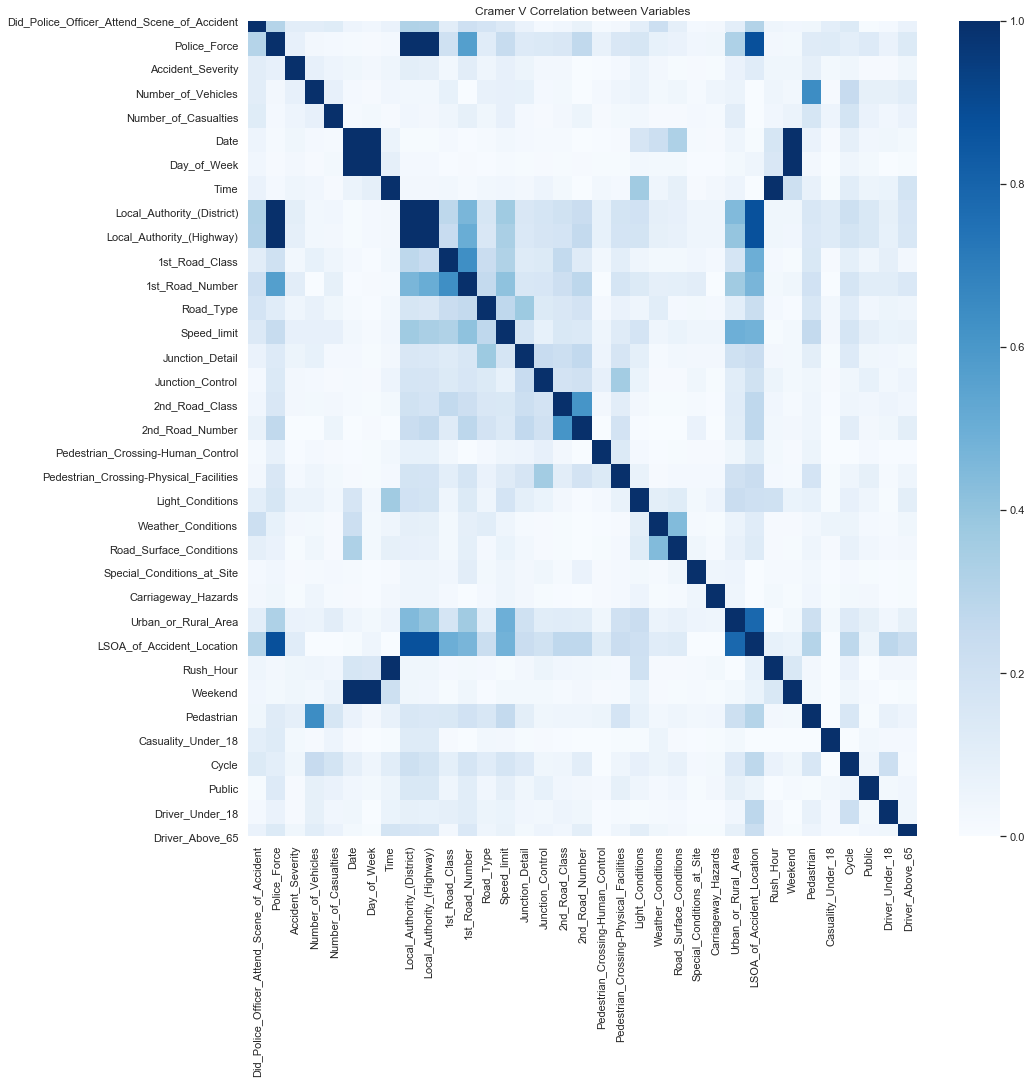

In [51]:
corr = pd.DataFrame(corrM, index=categorical_columns, columns=categorical_columns)
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr, annot=False, ax=ax, cmap="Blues"); 
ax.set_title("Cramer V Correlation between Variables");

<p>Unsurprisingly, the time-related variables are strongly associated with each other: Date, Day_of_Week, and Weekend.</p>
<p>The location related variables in the dataset, Police_Force, Local_Authority_(District), Local_Authority_(Highway), and LSOA_of_Accident_Location have a high association with the probability of a police officer to attend an accident. This is consistent with the findings presented under Geo Data Analysis.</p>

<h1>Modelling</h1>
<h2>Data Preparation for machine Learning</h2>
<p>Let's integrate the variables that were engineered during exploratory phase to build the training dataset. For the sake of briefity I copy them from the data dataframe. In a production system, the related steps of a data processing pipeline shoud be introduced.</p>

In [52]:
variables_to_join = ['Accident_Index', 'Rush_Hour', 'Weekend','Pedastrian', 'Casuality_Under_18', 
               'Casuality_Above_65', 'Cycle','Taxi', 'Van', 'Public', 'Driver_Under_18', 
               'Driver_Above_65']

In [53]:
acc_df = acc_df.merge(data[variables_to_join], on='Accident_Index')

# drop IDs and merge negative classes in response variable
acc_df.drop('Accident_Index', axis=1, inplace=True)
acc_df.loc[acc_df["Did_Police_Officer_Attend_Scene_of_Accident"] > 1, 
           "Did_Police_Officer_Attend_Scene_of_Accident"] = 0

# replace -1 missing category with nan in order to be able to implement missing values handling strategy
acc_df.replace(-1, np.nan, inplace=True)

<p>Then split classes and take care of the imbalanced response variable.</p>

In [54]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(acc_df, acc_df["Did_Police_Officer_Attend_Scene_of_Accident"]):
    train_set = acc_df.loc[train_index]
    test_set = acc_df.loc[test_index]

In [55]:
accidents = train_set.drop("Did_Police_Officer_Attend_Scene_of_Accident", axis=1) 
accidents_labels = train_set["Did_Police_Officer_Attend_Scene_of_Accident"].copy()

test = test_set.drop("Did_Police_Officer_Attend_Scene_of_Accident", axis=1) 
test_labels = test_set["Did_Police_Officer_Attend_Scene_of_Accident"].copy()

<h3>Data Processing Pipelines</h3>

In [56]:
# the list includes variables that are highly associated with each other 
# and variables with associated missing values
columns_to_remove = ['2nd_Road_Class', 'Special_Conditions_at_Site', 'Carriageway_Hazards', 
                     'Date', 'Accident_Index', 'Location_Easting_OSGR', 'Location_Northing_OSGR', 
                     'Time', 'Local_Authority_(District)', 'Local_Authority_(Highway)']

In [57]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import BayesianRidge

# transformer to remove columns
class RemoveColumns(BaseEstimator, TransformerMixin):
    def __init__(self, columns_to_remove):
        """
        Remove undesireble columns from the dataset.
        :param columns_to_remove: A list of strings
        """
        self.columns_to_remove = columns_to_remove
    
    def fit(self, X, y=None):
        return self  
    
    def transform(self, X, y=None):
        """
        This will transform the input Dataframe by iteratively removing columns provided
        in self.columns_to_remove.
        :param X: A dataset to be transformed
        :return: X trasformed dataset
        """
        for column in self.columns_to_remove:
            try:
                X.drop(column, axis=1, inplace=True)
            except:
                continue
        return X

In [58]:
# standard sklearn label encoder doesnt handle properly unseing labels, therefore we need to implement a custom class
# code taken from https://stackoverflow.com/questions/21057621/sklearn-labelencoder-with-never-seen-before-values
class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list: A list of strings to transform
        :return: transformed list of balies
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)

In [59]:
# label encoder for LSOA_of_Accident_Location
class LSOAEncoder(BaseEstimator, TransformerMixin):
    
    LSOA_encoder = LabelEncoderExt()
    
    def __init__(self, column_name="LSOA_of_Accident_Location"):
        """
        Initialize transformer with a column that needs to be trandformed
        :param column_name: name of a column to be transformed, string
        """
        self.column_name = column_name
        
    def fit(self, X, y=None):
        """
        This will fit LabelEmcoderExt transformer on a column self.column_name = column_name
        :param X: A dataset to be transformed
        :return: self
        """
        self.LSOA_encoder.fit(X[self.column_name].astype(str))
        return self  
    
    def transform(self, X, y=None):
        """
        This will transform the input self.column_name column of the dataset
        :param X: A dataset to be transformed
        :return: X
        """
        X[self.column_name] = self.LSOA_encoder.transform(X[self.column_name].astype(str))
        return X

In [60]:
class NaNImputer(BaseEstimator, TransformerMixin):
    
    def __init__(self, impute_strategy = "category"):
        """
        Imputer for missing values. Initialize transformer with an imputing strategy to be performed.
        :param impute_strategy: name of a strategy to be performef. Possible values: "category", "model"
        """
        self.impute_strategy = impute_strategy
    
    def fit(self, X, y=None):
        """
        If impute_strategy is "model", fit the Multivariate imputer IterativeImputer on imputing missing values 
        by training BayesianRidge() that estimates each feature from all the others by 
        modeling each feature with missing values as a function of other features in a 
        round-robin fashion.
        :param X: A dataset to be transformed
        :return: self
        """
        if self.impute_strategy == "model":
            self.imputer = IterativeImputer(BayesianRidge())
            self.imputer.fit(X)    
        return self  
    
    def transform(self, X, y=None):
        """
        This will transform the input dataset via performing one of the implemented imputing strategies.
        "category" - create a "-1" category for meissing value
        "model" - fills missing values based on the other features in the dataset
        :param X: A dataset to be transformed
        :return: X
        """
        if self.impute_strategy == "category":
            X.fillna(-1, inplace=True)
            return X
        if self.impute_strategy == "model":
            columns = X.columns
            impute_data = pd.DataFrame(imputer.transform(X), columns = columns)
            return impute_data

In [61]:
class LonScaler(BaseEstimator, TransformerMixin):
    
    scaler = StandardScaler()
    
    def fit(self, X, y=None):
        """
        This will fit StandardScaler on a column Longitude
        :param X: A dataset to be transformed
        :return: self
        """
        self.scaler.fit(X[['Longitude']])
        return self  
    
    def transform(self, X, y=None):
        """
        This will transform column Longitude of the input dataframe 
        :param X: A dataset to be transformed
        :return: X
        """
        X['Longitude'] = self.scaler.transform(X[['Longitude']])
        return X
    
class LatScaler(BaseEstimator, TransformerMixin):
    
    scaler = StandardScaler()
    
    def fit(self, X, y=None):
        """
        This will fit StandardScaler on a column Latitude
        :param X: A dataset to be transformed
        :return: self
        """
        self.scaler.fit(X[['Latitude']])
        return self  
    
    def transform(self, X, y=None):
        """
        This will transform column Latitude of the input dataframe 
        :param X: A dataset to be transformed
        :return: X
        """
        X['Latitude'] = self.scaler.transform(X[['Latitude']])
        return X

In [62]:
data_processing_pipeline = Pipeline([
        ('column_remover', RemoveColumns(columns_to_remove=columns_to_remove)),
        ('lsoa_encoder', LSOAEncoder()),
        ('imputer', NaNImputer(impute_strategy = "category")),
        ('lon_scaler', LonScaler()),
        ('lat_scaler', LatScaler())
    ])

accidents_prepared = data_processing_pipeline.fit_transform(accidents)
test_prepared = data_processing_pipeline.transform(test)

<h3>Train the Model</h3>
<p>I have chosen a Random Fores Classifier, partly because of the dimensionality of the dataset. Many ML models like Logistic Regression or SVM require categorical variables to be One-Hot encoded. As the majority of variables in our dataset are categorical and some of them have a high cardinality, it would lead to the creation of a very large sparse matrix, which will slow down the training and harm the overall performance of the model.</p>
<p>Let's run a RandomizedSearch to find the best hyperparameters of the model.</p>

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_grid = {
    'bootstrap': [True],
    'max_depth': [50, 100],
    'max_features': [3, 8],
    'min_samples_leaf': [3, 5],
    'min_samples_split': [2, 5],
    'n_estimators': [300, 500]
}

forest_reg = RandomForestClassifier(random_state=42, class_weight="balanced")
rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_grid,
                                n_iter=5, cv=5, scoring='f1_weighted', random_state=42)
rnd_search.fit(accidents_prepared, accidents_labels)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
         

<h3>Evaluate the Model</h3>
<p>To evaluate the model, I use the weighted F1 on a validation dataset:</p>

In [64]:
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

cvres = rnd_search.cv_results_
for f1_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(f1_score, params)

0.7826107685872115 {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 5, 'max_features': 8, 'max_depth': 100, 'bootstrap': True}
0.7825625741911669 {'n_estimators': 500, 'min_samples_split': 5, 'min_samples_leaf': 5, 'max_features': 8, 'max_depth': 50, 'bootstrap': True}
0.7851196250191437 {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 8, 'max_depth': 100, 'bootstrap': True}
0.7819020443176175 {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 3, 'max_depth': 100, 'bootstrap': True}
0.785035289978097 {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 3, 'max_features': 8, 'max_depth': 50, 'bootstrap': True}


In [65]:
final_model = rnd_search.best_estimator_

In [66]:
scores = cross_val_score(final_model, accidents_prepared, accidents_labels,
                         scoring="f1_weighted", cv=5)

In [67]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard Deviation:", scores.std())

print("Validation Dataset")
display_scores(scores)

Validation Dataset
Scores: [0.78624988 0.78681726 0.78466527 0.78476337 0.78310235]
Mean: 0.7851196250191437
Standard Deviation: 0.001308602189439606


In [68]:
predictions = final_model.predict(test_prepared)
print("Test Dataset")
print(classification_report(test_labels, predictions))

Test Dataset
              precision    recall  f1-score   support

           0       0.61      0.55      0.58      6881
           1       0.84      0.87      0.86     19116

    accuracy                           0.79     25997
   macro avg       0.73      0.71      0.72     25997
weighted avg       0.78      0.79      0.79     25997



In [69]:
predictions_train = final_model.predict(accidents_prepared)
print("Train Dataset")
print(classification_report(accidents_labels, predictions_train))

Train Dataset
              precision    recall  f1-score   support

           0       0.90      0.95      0.93     27522
           1       0.98      0.96      0.97     76463

    accuracy                           0.96    103985
   macro avg       0.94      0.96      0.95    103985
weighted avg       0.96      0.96      0.96    103985



<p>After tuning the hyperparameters of the model, the performance on the training dataset is much better than on the validation and test datasets which indicates overfitting. In order to regularize the model we will decrease the depth of the trees and increase min_samples_split, min_samples_leaf.</p>

In [72]:
reg_tree_mod = RandomForestClassifier(random_state=42, class_weight="balanced",
                                 n_estimators= 300, min_samples_split= 5,
                                  min_samples_leaf= 3, max_features= 8, max_depth= 20, 
                                  bootstrap= True)
reg_tree_mod.fit(accidents_prepared, accidents_labels)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=20, max_features=8,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [73]:
predictions = reg_tree_mod.predict(test_prepared)
print("Test Dataset")
print(classification_report(test_labels, predictions))

Test Dataset
              precision    recall  f1-score   support

           0       0.56      0.66      0.60      6881
           1       0.87      0.81      0.84     19116

    accuracy                           0.77     25997
   macro avg       0.71      0.74      0.72     25997
weighted avg       0.79      0.77      0.78     25997



In [74]:
predictions = reg_tree_mod.predict(accidents_prepared)
print("Train Dataset")
print(classification_report(accidents_labels, predictions))

Train Dataset
              precision    recall  f1-score   support

           0       0.70      0.86      0.77     27522
           1       0.95      0.87      0.90     76463

    accuracy                           0.87    103985
   macro avg       0.82      0.87      0.84    103985
weighted avg       0.88      0.87      0.87    103985



<p>Now the weighted F1 looks better. Hovever, the model might need further tuning or more data to reduce overfitting.</p>

Normalized confusion matrix
[[0.6560093  0.3439907 ]
 [0.18591756 0.81408244]]


<Figure size 432x432 with 0 Axes>

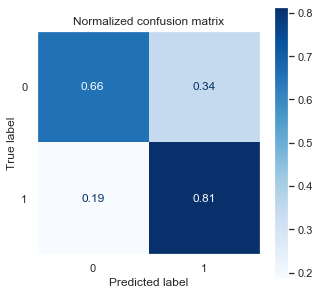

In [75]:
from sklearn.metrics import plot_confusion_matrix

# Plot normalized confusion matrix
class_names = [0,1]
plt.figure(figsize=(6,6))
disp = plot_confusion_matrix(reg_tree_mod, test_prepared, test_labels,
                             display_labels=class_names,
                             cmap=plt.cm.Blues,
                             normalize="true")
disp.ax_.set_title("Normalized confusion matrix")

print("Normalized confusion matrix")
print(disp.confusion_matrix)
plt.grid(b=None)
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.show()

<p>The model correctly classified 66% of cases where police officer did not attend the accident. As well as in 81% of cases where police officer attended the accident.</p>

<h4>Get the probabilities of an attendence </h4>

In [76]:
probabilities = reg_tree_mod.predict_proba(test_prepared)

No Skill: ROC AUC=0.500
Random Forest: ROC AUC=0.828


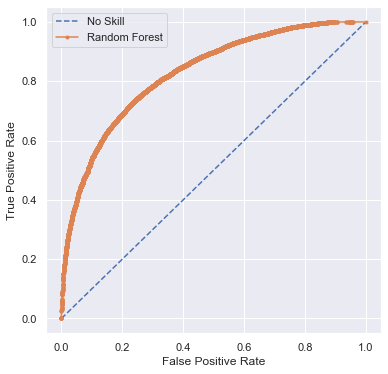

In [77]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# keep probabilities for the positive outcome only
rf_probabilities = probabilities[:, 1]
ns_probabilities = [0 for _ in range(len(test_labels))]
# calculate scores
ns_auc = roc_auc_score(test_labels, ns_probabilities)
rf_auc = roc_auc_score(test_labels, rf_probabilities)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Random Forest: ROC AUC=%.3f' % (rf_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(test_labels, ns_probabilities)
rf_fpr, rf_tpr, _ = roc_curve(test_labels, rf_probabilities)
plt.figure(figsize=(6,6))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(rf_fpr, rf_tpr, marker='.', label='Random Forest')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show()

<p>The area Under the ROC curve is 0.83 which is a decent performance for a baseline model.</p>

<h3>Feature Importance</h3>

In [78]:
from rfpimp import permutation_importances

def f1_fun(rf, X_train, y_train):
    return f1_score(y_train, rf.predict(X_train))

perm_imp_rfpimp = permutation_importances(reg_tree_mod, accidents_prepared, accidents_labels, f1_fun)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


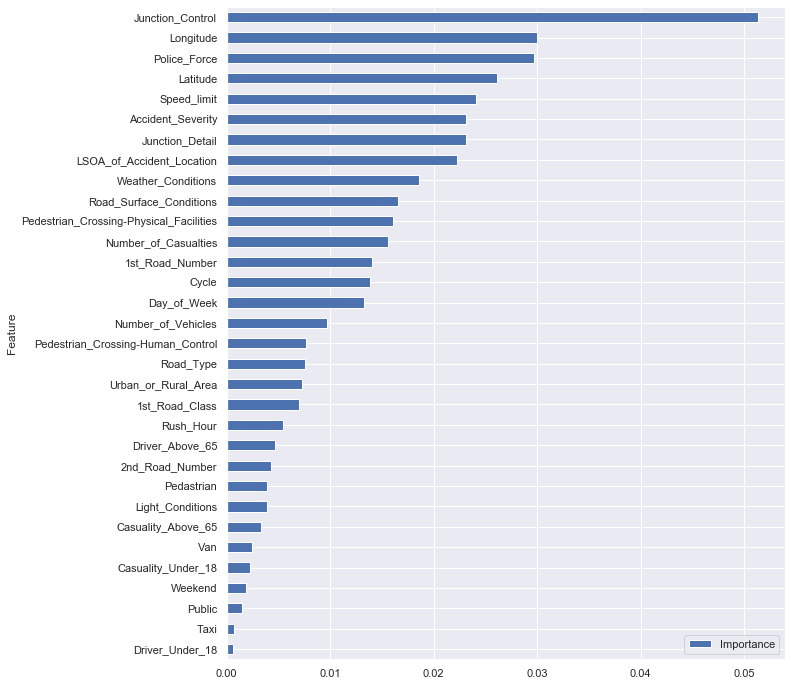

In [79]:
perm_imp_rfpimp.sort_values("Importance").plot(kind="barh", figsize=(10,12)).legend(loc="lower right")

<p>The feature importance of the implemented classifier is consistent with the findings provided in the Exploratory Data Analysis section. Junction_Control, Geo variables, and Ploice Force are the features with the highest discriminative power. From the engineered features the most important are Cycle and Rush_Hour. They also have the highest association values of the Cramer's phi.</p>